<h1> ShroomDK Mint </h1>

![SHROOMDK NFT](sdk.png)

In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### What is ShroomDK?

Flipside decided to release their SDK as an NFT, which gives NFT holders access to their blockchain data. Users can use Javascript/Typescript and Python to query database tables offered by Flipside. A random supply of these NFTs are dropped daily and are free to mint (users just have to pay for gas fees). Anyone who successfully mints will receive a referral code that they can share with a friend, which will allow them to mint on that day as well (even if the daily mint limit has been reached).

The address of ShroomDK contract is https://etherscan.io/address/0xdfb57b6e16ddb97aeb8847386989f4dca7202146.

## Objective

In this notebook, we are going to explore the following:

1. Number of ShroomDK NFTs minted so far
2. Number of failed transactions
3. Number of unique addresses that hold ShroomDK NFT
4. Average gas paid to mint
5. How fast do the ShroomDK NFTs mint out each day?
6. Number of transfers corresponding to ShroomDK NFT 

(We are going to use data from 06/29/2022 to 07/01/2022 and use ethereum tables `ez_nft_mints` and  `ez_nft_sales`)


The data has been exported using queries on Flipside. The next two cells contain the queries that will be used for this analysis.

## Read Data

**NFT Mints Data Overview**

This data shows mint transaction details.

In [118]:
"""
SELECT block_timestamp,
  block_number,
  tx_hash,
  event_type,
  nft_address,
  project_name,
  nft_from_address,
  nft_to_address,
  tokenid,
  mint_price_eth,
  tx_fee
FROM ethereum.core.ez_nft_mints
WHERE nft_address ILIKE '0xdfb57B6E16DDB97Aeb8847386989f4DCA7202146'
ORDER BY block_timestamp;
"""

mint_df = pd.read_json(
    "https://node-api.flipsidecrypto.com/api/v2/queries/9e601858-6bc9-4ef4-a6c1-43452821f690/data/latest"
)

# Extract date and time(hour) from timestamp.
mint_df["BLOCK_TIMESTAMP"] = pd.to_datetime(mint_df["BLOCK_TIMESTAMP"])
mint_df["DATE"] = mint_df["BLOCK_TIMESTAMP"].dt.date.astype(str)
mint_df["TIME (in UTC)"] = mint_df["BLOCK_TIMESTAMP"].dt.hour.astype(str)

mint_df.head()


,BLOCK_TIMESTAMP,BLOCK_NUMBER,TX_HASH,EVENT_TYPE,NFT_ADDRESS,PROJECT_NAME,NFT_FROM_ADDRESS,NFT_TO_ADDRESS,TOKENID,MINT_PRICE_ETH,TX_FEE,DATE,TIME (in UTC)
0,2022-06-29 12:36:20,15045048,0xfdf24801fbd990540f279e595e70ea1cf6d7adfe8bad...,nft_mint,0xdfb57b6e16ddb97aeb8847386989f4dca7202146,flipside,0x0000000000000000000000000000000000000000,0x4a9318f375937b56045e5a548e7e66aea61dd610,0,0,0.006121,2022-06-29,12
1,2022-06-29 12:53:31,15045107,0xd0b0f954915efe5c0960516b60d143d65c664b1dd5c2...,nft_mint,0xdfb57b6e16ddb97aeb8847386989f4dca7202146,flipside,0x0000000000000000000000000000000000000000,0x23253559632ed2c8dfb6b6e10e85d03c871c7d68,1,0,0.005764,2022-06-29,12
2,2022-06-29 12:54:19,15045108,0xd49545efa140e803e5ef4fda4fc07835fcb79a113ce9...,nft_mint,0xdfb57b6e16ddb97aeb8847386989f4dca7202146,flipside,0x0000000000000000000000000000000000000000,0x23253559632ed2c8dfb6b6e10e85d03c871c7d68,2,0,0.005980,2022-06-29,12
3,2022-06-29 12:59:09,15045125,0xe56628d21fd13daad61418d4c65d41140aa3406321a6...,nft_mint,0xdfb57b6e16ddb97aeb8847386989f4dca7202146,flipside,0x0000000000000000000000000000000000000000,0x4695a3ecde63ec9027733f3f63aa241b3d5f3095,3,0,0.007474,2022-06-29,12
4,2022-06-29 13:00:48,15045129,0xe5d02bf69df61092a61d4c19b783f7ebdfc31907f619...,nft_mint,0xdfb57b6e16ddb97aeb8847386989f4dca7202146,flipside,0x0000000000000000000000000000000000000000,0xd45536f11169d3e0f316cf1c2bd95424acfbacc5,4,0,0.009775,2022-06-29,13


**NFT Sales Data Overview**

This data shows how many ShroomDK NFTs are sold on OpenSea.

In [6]:
"""
SELECT block_timestamp,
  price AS eth_price
FROM ethereum.core.ez_nft_sales
WHERE nft_address ILIKE '0xdfb57B6E16DDB97Aeb8847386989f4DCA7202146'
ORDER BY block_timestamp;
"""

nft_transfers_df = pd.read_json(
    "https://node-api.flipsidecrypto.com/api/v2/queries/8ceaed7e-899e-4fc3-b0c6-d601f0d8d6f4/data/latest"
)
nft_transfers_df


,BLOCK_TIMESTAMP,ETH_PRICE
0,2022-06-30 06:40:36.000,0.090
1,2022-06-30 18:14:07.000,0.090
2,2022-07-01 14:02:45.000,0.079
3,2022-07-01 16:00:59.000,0.079


## Analysis

### Number of mints up till 07-01-2022

In [157]:
f"""Total ShroomDK NFT minted so far: {mint_df["TOKENID"].nunique()}"""

'Total ShroomDK NFT minted so far: 290'

### Number of unique owners

In [158]:
f"""Number of unique users who minted ShroomDK NFT: {mint_df["NFT_TO_ADDRESS"].nunique()}"""

'Number of unique users who minted ShroomDK NFT: 194'

### Number of mints per user. How many minted all 2?

The graph below shows how many people (out of 290) have minted all 2 NFTs.

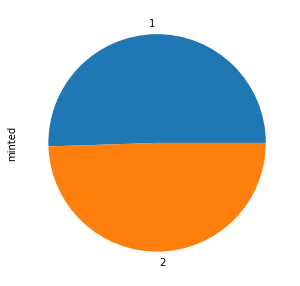

In [169]:
fig, ax = plt.subplots(figsize=(10, 5))

pd.DataFrame(mint_df.groupby("NFT_TO_ADDRESS").agg("size")).rename(
    columns={0: "minted"}
)["minted"].value_counts().plot(kind='pie')


In [134]:
# Percentage Breakdown
mint_df.groupby("NFT_TO_ADDRESS").agg({"NFT_TO_ADDRESS": "size"}).rename(
    columns={"NFT_TO_ADDRESS": "minted"}
)["minted"].value_counts(2)

1    0.505155
2    0.494845
Name: minted, dtype: float64

Each user is allowed to mint 2 ShroomDK NFTs. However, 50% of the 290 people have only minted 1. 

### Number of failed transactions

The following query was used to get the failed transactions on Flipside.

In [156]:
"""
SELECT block_number,
  block_timestamp
  block_hash,
  tx_hash,
  from_address,
  to_address,
  tx_fee,
  status
FROM ethereum.core.fact_transactions
WHERE to_address ILIKE '0xdfb57b6e16ddb97aeb8847386989f4dca7202146'
  AND status = 'FAIL'
ORDER BY block_timestamp DESC;
"""

pd.read_json(
    "https://node-api.flipsidecrypto.com/api/v2/queries/4ac71949-5508-4864-9467-6d7a8518996e/data/latest"
)

,BLOCK_NUMBER,BLOCK_HASH,TX_HASH,FROM_ADDRESS,TO_ADDRESS,TX_FEE,STATUS
0,15056751,2022-07-01 13:02:26.000,0x04a7eed092de59d7adcb7902cf5d250bdcab01043461...,0x7abcd4133cdfef01d1fce4be7b7e1e81113a33d6,0xdfb57b6e16ddb97aeb8847386989f4dca7202146,0.000992,FAIL
1,15046014,2022-06-29 17:07:00.000,0xf637b1a13e44e89c77ebf3ddec9d92c7692bde0570ee...,0xb8c2d03cafffe98e35ceea1a399372dd8fafa91a,0xdfb57b6e16ddb97aeb8847386989f4dca7202146,0.002194,FAIL
2,15046006,2022-06-29 17:04:49.000,0x344161ebd378a3aa42b0afbc20f3cf1fa82bdcf375a1...,0xb8c2d03cafffe98e35ceea1a399372dd8fafa91a,0xdfb57b6e16ddb97aeb8847386989f4dca7202146,0.002205,FAIL
3,15045222,2022-06-29 13:26:23.000,0x93d20a45ffc2e6985bf5cab4201b0fa1f581f1dcb051...,0xd5ad08af3c21e666c58ce36ab4dfe9d433066466,0xdfb57b6e16ddb97aeb8847386989f4dca7202146,0.001332,FAIL


There has been a total of 4 failed transactions, 2 of which were caused by a user trying to mint more than the limit of 2 NFT. Fortunately, the total gas fees paid for all failed transaction is around $7 (0.0067 ETH). 

### Number of mints per day

Let's see how any ShroomDK NFTs are minted each day.

In [37]:
mints_per_day_df = mint_df.groupby("DATE").agg({"TX_HASH": "size"}).rename(
    columns={"TX_HASH": "shroomDK_minted"}
)
mints_per_day_df

,shroomDK_minted
DATE,
2022-06-29,144
2022-06-30,50
2022-07-01,96


Text(0.5, 1.0, 'Number of ShroomDK NFT minted')

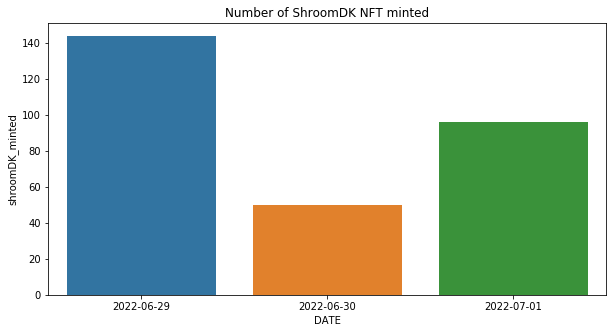

In [38]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x = mints_per_day_df.index, y = "shroomDK_minted", data = mints_per_day_df)
plt.title("Number of ShroomDK NFT minted")

As can be seen from the graph, Flipside released a lot of ShroomDK NFT on the first day of its release. After that, they have randomly released a smaller supply in the next 2 days. (Note that this daily count also contains the NFT minted through a referral code)

### How fast does it mint out?

Let's see how fast are ShroomDK NFTs sold out after their release each day.

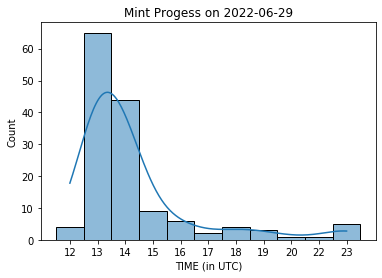

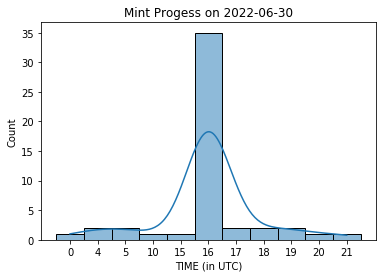

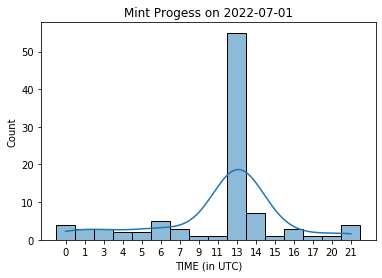

In [117]:
for d in ["2022-06-29", "2022-06-30", "2022-07-01"]:
    plt.figure()
    plt.title(f"Mint Progess on {d}")
    sns.histplot(x = "TIME (in UTC)", data = mint_df[mint_df["DATE"]==d], kde=True)
    

As evident from the above graphs, the NFT experiences a greater volume in the first couple hour of its release, with others minting throughout the day using the referral code. (The ShroomDK NFT holders can give a referral code to anyone who can then mint an NFT whenever they like.) High volume at 13UTC (9AM Eastern) potentially indicates that people are excited to try Flipside's API. 

### Gas Fees Paid

Let's see how much are people paying for gas in the mornings minting ShroomDK.

In [164]:
gas_per_day_df = mint_df.groupby("DATE").agg({"TX_FEE": "mean"}).rename(
    columns={"TX_FEE": "average_gas_fee"}
)
gas_per_day_df["avg_gas_fee_in_USD"] = gas_per_day_df["average_gas_fee"] * 1100  # Assuming 1 ETH = $1100
gas_per_day_df

,average_gas_fee,avg_gas_fee_in_USD
DATE,,
2022-06-29,0.010536,11.589785
2022-06-30,0.009272,10.199328
2022-07-01,0.004625,5.087403


Text(0.5, 1.0, 'Gas Fee Paid (in USD)')

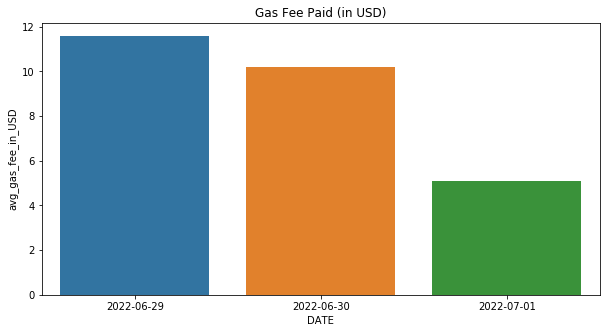

In [166]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x = gas_per_day_df.index, y = "avg_gas_fee_in_USD", data = gas_per_day_df)
plt.title("Gas Fee Paid (in USD)")

The average gas fees paid by a user is \\$9.2. The highest gas paid by a user is \\$30.81. The lowest gas paid by a user is \\$1.84. Overall, low gas fees!!

### Number of Transfers 

Let's see how many NFTs have been sold.

In [45]:
nft_transfers_df  # A total of 4 transfers

,BLOCK_TIMESTAMP,ETH_PRICE
0,2022-06-30 06:40:36.000,0.090
1,2022-06-30 18:14:07.000,0.090
2,2022-07-01 14:02:45.000,0.079
3,2022-07-01 16:00:59.000,0.079


In [111]:
f"""Total Volume in secondary market is {nft_transfers_df["ETH_PRICE"].sum().round(2)} ETH"""

'Total Volume in secondary market is 0.34 ETH'

## Conclusion

1. A total of 290 shroomDK NFT has been minted in 3 days (06/29-07/01) by 194 people. The minting experience seems smooth, since there have been only 4 failed transactions.
2. 98 out of 194 people minted 1 ShroomDK, while the other 96 people minted all 2.
3. The gas fees has been low compared to other mints. The average gas fees paid by a user to mint ShroomDK is \\$9.2. The highest gas paid by a user is \\$30.81. The lowest gas paid by a user is \\$1.84.
4. People seem to be hodling their ShroomDK NFT -- there has been only 4 sales so far on Opensea, and only 9 are listed for sale (as of 7/1/22, 8PM CST).
5. In the 3 days the NFT has been released, most ShroomDK NFTs sell out within 2 hours, with others minting throughout the day via the referral code that the minters give them.